
<h1><center>Simple Linear Regression</center></h1>


<h4>About this Notebook</h4>
Dans ce cahier, nous apprenons à utiliser scikit-learn pour implémenter une régression linéaire simple. Nous téléchargeons un ensemble de données lié à la consommation de carburant et aux émissions de dioxyde de carbone des voitures. Ensuite, nous divisons nos données en ensembles d'entraînement et de test, créons un modèle à l'aide d'un ensemble d'entraînement, évaluons votre modèle à l'aide d'un ensemble de test et enfin utilisons le modèle pour prédire la valeur inconnue.

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#understanding_data">Understanding the Data</a></li>
        <li><a href="#reading_data">Reading the data in</a></li>
        <li><a href="#data_exploration">Data Exploration</a></li>
        <li><a href="#simple_regression">Simple Regression Model</a></li>
    </ol>
</div>
<br>
<hr>

### Importing Needed packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline



### Downloading Data
To download the data, we will use !wget to download it from IBM Object Storage.


`https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv`

In [4]:
#ubuntu
# !wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

__Did you know?__ When it comes to Machine Learning, you will likely be working with large datasets. As a business, where can you host your data? IBM is offering a unique opportunity for businesses, with 10 Tb of IBM Cloud Object Storage: [Sign up now for free](http://cocl.us/ML0101EN-IBM-Offer-CC)


<h2 id="understanding_data">Understanding the Data</h2>

### `FuelConsumption.csv`:
We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


<h2 id="reading_data">Reading the data in</h2>

In [17]:
df = pd.read_csv("FuelConsumption.csv")

# take a look at the dataset
df.head()



,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


<h2 id="data_exploration">Data Exploration</h2>
Lets first have a descriptive exploration on our data.

In [6]:
# summarize the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Lets select some features to explore more.

Sélectionnons quelques fonctionnalités pour en savoir plus.

In [7]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


we can plot each of these features:

nous pouvons tracer chacune de ces caractéristiques :

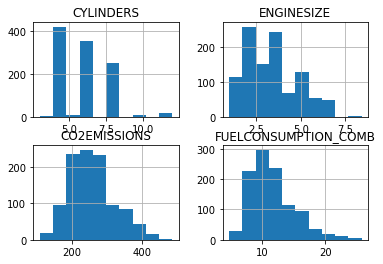

In [8]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

Maintenant, traçons chacune de ces caractéristiques par rapport à l'émission, pour voir à quel point leur relation est linéaire :

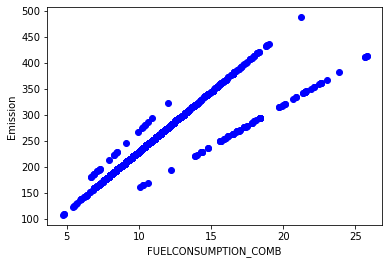

In [9]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

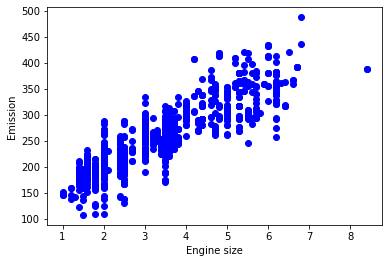

In [10]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

## Practice
tracer __CYLINDRE__ vs l'émission, pour voir à quel point leur relation est linéaire :


#### Creating train and test dataset
Train/Test Split consiste à diviser l'ensemble de données en ensembles d'apprentissage et de test, respectivement, qui s'excluent mutuellement. Après quoi, vous vous entraînez avec l'ensemble d'entraînement et testez avec l'ensemble de test.
Cela fournira une évaluation plus précise de la précision hors échantillon, car l'ensemble de données de test ne fait pas partie de l'ensemble de données qui a été utilisé pour former les données. Il est plus réaliste pour les problèmes du monde réel.

Cela signifie que nous connaissons le résultat de chaque point de données dans cet ensemble de données, ce qui le rend idéal pour tester ! Et puisque ces données n'ont pas été utilisées pour former le modèle, le modèle n'a aucune connaissance du résultat de ces points de données. Donc, en substance, il s'agit vraiment d'un test hors échantillon.

Séparons notre ensemble de données en ensembles d'entraînement et de test, 80 % de l'ensemble des données pour l'entraînement et 20 % pour les tests. Nous créons un masque pour sélectionner des lignes aléatoires à l'aide de la fonction __np.random.rand()__ :

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline
#ubuntu
# !wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
df = pd.read_csv("FuelConsumption.csv")
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]
np.random.rand()

0.5266167754429123

<h2 id="simple_regression">Simple Regression Model</h2>
Linear Regression fits a linear model with coefficients $\theta = (\theta_1, ..., \theta_n)$ to minimize the 'residual sum of squares' between the independent x in the dataset, and the dependent y by the linear approximation. 

#### Train data distribution

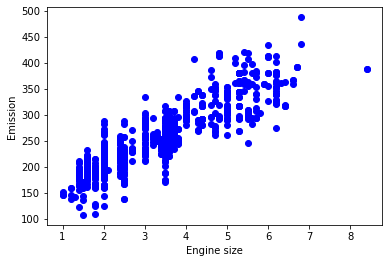

In [14]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

#### Modeling
Using sklearn package to model data.

In [15]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[39.23410678]]
Intercept:  [125.54957877]


Comme mentionné précédemment, __Coefficient__ et __Intercept__ dans la régression linéaire simple, sont les paramètres de la droite d'ajustement.
Etant donné qu'il s'agit d'une simple régression linéaire, avec seulement 2 paramètres, et sachant que les paramètres sont l'ordonnée à l'origine et la pente de la droite, sklearn peut les estimer directement à partir de nos données.
Notez que toutes les données doivent être disponibles pour parcourir et calculer les paramètres.


#### Plot outputs

we can plot the fit line over the data:

Text(0, 0.5, 'Emission')

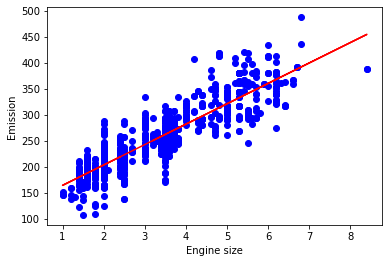

In [16]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

#### Evaluation
nous comparons les valeurs réelles et les valeurs prédites pour calculer la précision d'un modèle de régression. Les mesures d'évaluation jouent un rôle clé dans le développement d'un modèle, car elles donnent un aperçu des domaines qui nécessitent des améliorations.

Il existe différentes métriques d'évaluation de modèle, utilisons ici MSE pour calculer la précision de notre modèle en fonction de l'ensemble de test :
<ul>
    <li> Mean absolute error: C'est la moyenne de la valeur absolue des erreurs. Il s'agit de la statistique la plus simple à comprendre, car il ne s'agit que d'une erreur moyenne.</li>
    <li> Mean Squared Error (MSE): L'erreur quadratique moyenne (MSE) est la moyenne de l'erreur quadratique. Il est plus populaire que l'erreur absolue moyenne car l'accent est davantage mis sur les erreurs importantes. Cela est dû au fait que le terme au carré augmente de manière exponentielle les erreurs les plus importantes par rapport aux plus petites</li>
    <li> Root Mean Squared Error (RMSE):il s'agit de la racine carrée de l'erreur quadratique moyenne. </li>
    <li> R-squaredn'est pas une erreur, mais une mesure populaire pour la précision de votre modèle. Il représente la proximité des données par rapport à la ligne de régression ajustée. Plus le R au carré est élevé, plus le modèle correspond à vos données. Le meilleur score possible est de 1,0 et il peut être négatif (car le modèle peut être arbitrairement pire).</li>
</ul>

In [17]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 22.61
Residual sum of squares (MSE): 876.99
R2-score: 0.72
